# Анализ убытков приложения ProcrastinatePRO+

**Описание проекта:**  
В данном исследовании проводится маркетинговый анализ причин убыток развлекательного приложения Procrastinate Pro+. Несколько месяцев в привлечение пользователей были вложены деньги, но они не принесли результата. Компания показывает реузльтаты ниже уровня доходности.

**Цели и задачи проекта:**   
- Выявить **причины неэффективности** привлечения пользователей:
  - Определить окупается ли реклама в целом;
  - Определить какие устройства, страны и каналы могут снижать окупаемость рекламы;
  - Чем могут быть вызваны проблемы окупаемости;
- **Сформулировать рекомендации** для отдела маркетинга

В распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. В рамках исследования будет изучено, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

**Описание данных**  
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Изучение данных

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style='darkgrid')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.mode.chained_assignment = None  
import warnings
warnings.filterwarnings('ignore')

In [3]:
#загрузим данные и запишем их в соответствующие переменные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Посмотрим общую информацию о датафреймах

In [4]:
def data_info(df): # функция для просмотра информации о датасетах
    display(df.sample(10))
    display(df.info())
    print('Количество строк и столбцов:', df.shape) 
    print('Число полных дубликатов строк:', df.duplicated().sum())
    display(df.describe(include = ['object']).T) # оценка уникальных категориальных значений  
    display(df.describe().T) # оценка числовых значений 
    print('Число пропусков:\n', df.isna().sum())
    display(pd.DataFrame(round((df.isna().mean()*100),2), columns=['NaNs, %']) # визуализация процентного соотношения пропусков 
        .style.format('{:.2f}')
        .background_gradient('coolwarm'))
    for column in df.columns: # считаем циклом отрицательные значения  
        try:
            print(column, '— отрицательных значений —', df[df[column] < 0][column].count()) 
        except: #None;
            print(column, '— столбец содержит категориальные переменные')      

In [5]:
data_info(visits)

,User Id,Region,Device,Channel,Session Start,Session End
138035,429885016076,United States,iPhone,TipTop,2019-09-08 19:11:20,2019-09-08 19:16:14
154579,982431976994,United States,PC,FaceBoom,2019-09-22 16:59:29,2019-09-22 17:16:14
152708,546895800155,United States,Mac,organic,2019-09-21 17:52:33,2019-09-21 18:03:52
171860,218767312804,United States,iPhone,organic,2019-10-03 01:51:50,2019-10-03 02:47:57
158,762967736114,United States,Mac,RocketSuperAds,2019-05-01 03:00:07,2019-05-01 03:37:36
28688,513626741023,United States,Android,organic,2019-05-30 11:53:47,2019-05-30 12:06:29
99808,502016136699,United States,PC,organic,2019-08-07 02:36:15,2019-08-07 02:50:11
216144,695421118178,Germany,PC,organic,2019-05-19 15:13:48,2019-05-19 15:37:58
156783,714174397659,United States,iPhone,TipTop,2019-09-24 15:23:57,2019-09-24 15:28:44
98357,935006616337,United States,Mac,FaceBoom,2019-08-05 23:59:27,2019-08-06 00:03:25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество строк и столбцов: (309901, 6)
Число полных дубликатов строк: 0


,count,unique,top,freq
Region,309901,4,United States,207327
Device,309901,4,iPhone,112603
Channel,309901,11,organic,107760
Session Start,309901,306813,2019-08-24 12:06:37,3
Session End,309901,306793,2019-10-25 07:28:19,3


,count,mean,std,min,25%,50%,75%,max
User Id,309901.00,499766449382.70,288789916887.83,599326.00,249369122776.00,498990589687.00,749521111616.00,999999563947.00


Число пропусков:
 User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


,"NaNs, %"
User Id,0.00
Region,0.00
Device,0.00
Channel,0.00
Session Start,0.00
Session End,0.00


User Id — отрицательных значений — 0
Region — столбец содержит категориальные переменные
Device — столбец содержит категориальные переменные
Channel — столбец содержит категориальные переменные
Session Start — столбец содержит категориальные переменные
Session End — столбец содержит категориальные переменные


**Таблица visits / наблюдения:**      
- Имеем датафрейм в котором 6 столбцов и 300 тыс. строк, типы данных int(1), object(5).   
- Отрицательных значений в ячейках нет.   
- Явных(полных) дубликатов строк нет.   
- Пропусков нет.    
- Названия столбцов датафрейма можно перевести в нижний регистр и заменить пробелы на 'змеиный' регистр.  
- Формат Session Start / Session End - object, необходимо первести в формат даты.

In [6]:
data_info(orders)

,User Id,Event Dt,Revenue
12412,545340802715,2019-08-14 18:22:53,4.99
28214,768970513761,2019-05-13 13:22:56,4.99
4014,263280160882,2019-06-19 17:14:40,4.99
35871,918742544453,2019-09-17 23:24:30,4.99
20243,81779122731,2019-09-26 21:57:01,4.99
20090,151051511897,2019-09-25 23:59:47,4.99
2892,124179148691,2019-06-08 11:01:30,4.99
16000,199104812192,2019-09-03 02:22:52,4.99
3201,889032365386,2019-06-11 09:23:03,4.99
3277,313984711081,2019-06-12 02:43:01,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество строк и столбцов: (40212, 3)
Число полных дубликатов строк: 0


,count,unique,top,freq
Event Dt,40212,40163,2019-10-02 10:23:29,2


,count,mean,std,min,25%,50%,75%,max
User Id,40212.00,499029531203.23,286093675967.17,599326.00,251132440436.75,498283972665.00,743332711780.00,999895427370.00
Revenue,40212.00,5.37,3.45,4.99,4.99,4.99,4.99,49.99


Число пропусков:
 User Id     0
Event Dt    0
Revenue     0
dtype: int64


,"NaNs, %"
User Id,0.00
Event Dt,0.00
Revenue,0.00


User Id — отрицательных значений — 0
Event Dt — столбец содержит категориальные переменные
Revenue — отрицательных значений — 0


**Таблица orders / наблюдения:**      
- Имеем датафрейм в котором 3 столбца и 40 тыс. строк, типы данных int, object, float.   
- Отрицательных значений в ячейках нет.   
- Явных(полных) дубликатов строк нет.   
- Пропусков нет.    
- Названия столбцов датафрейма можно перевести в нижний регистр и заменить пробелы на 'змеиный' регистр.  
- Формат Event Dt - object, необходимо первести в формат даты.

In [7]:
data_info(costs)

,dt,Channel,costs
63,2019-07-03,FaceBoom,193.60
293,2019-08-22,MediaTornado,3.60
1601,2019-10-09,WahooNetBanner,26.40
260,2019-07-20,MediaTornado,3.36
353,2019-10-21,MediaTornado,6.24
29,2019-05-30,FaceBoom,178.20
752,2019-06-02,YRabbit,7.50
76,2019-07-16,FaceBoom,123.20
1480,2019-06-10,WahooNetBanner,28.20
563,2019-05-24,TipTop,102.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество строк и столбцов: (1800, 3)
Число полных дубликатов строк: 0


,count,unique,top,freq
dt,1800,180,2019-09-03,10
Channel,1800,10,WahooNetBanner,180


,count,mean,std,min,25%,50%,75%,max
costs,1800.00,58.61,107.74,0.80,6.50,12.29,33.60,630.00


Число пропусков:
 dt         0
Channel    0
costs      0
dtype: int64


,"NaNs, %"
dt,0.00
Channel,0.00
costs,0.00


dt — столбец содержит категориальные переменные
Channel — столбец содержит категориальные переменные
costs — отрицательных значений — 0


**Таблица costs / наблюдения:**      
- Имеем датафрейм в котором 3 столбца и 40 тыс. строк, типы данных object, float.   
- Отрицательных значений в ячейках нет.   
- Явных(полных) дубликатов строк нет.   
- Пропусков нет.    
- Названия столбцов датафрейма можно перевести в нижний регистр. 
- Формат столбца dt - object, необходимо первести в формат даты.

### Предобработка данных


In [8]:
# заменим пробелы в названиях столбцов на нижний и "змеиный" регистр
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower() 

In [9]:
# перевод типа данных столбцов времени из строчного в тип "datetime"
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date  # ниже merge ругался на datetime64[ns] and object, поэтому вернул object

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
# Рассмотрим временные промежутки предоставленных данных (проверка аномалий):
print('Даты в visits (начало сессии) с {} по {}'.format(visits['session_start'].min(), visits['session_start'].max()))
print('Даты в visits (окончание сессии) с {} по {}'.format(visits['session_end'].min(), visits['session_end'].max()))
print('Даты в orders с {} по {}'.format(orders['event_dt'].min(), orders['event_dt'].max()))
print('Даты в costs с {} по {}'.format(costs['dt'].min(), costs['dt'].max()))

Даты в visits (начало сессии) с 2019-05-01 00:00:41 по 2019-10-31 23:59:23
Даты в visits (окончание сессии) с 2019-05-01 00:07:06 по 2019-11-01 01:38:46
Даты в orders с 2019-05-01 00:28:11 по 2019-10-31 23:56:56
Даты в costs с 2019-05-01 по 2019-10-27


Временной интервал не соответствует условию проекта:
в описании указано, что данные за период с 01.05.2019 по 27.10.2019, в данных же наблюдаются такие даты, как 31.10.2019, 2019.11.01 и прочие.   
Проверим, сколько событий сессий / покупок(orders) произошло после 27.10.2019:

In [12]:
print('Визиты (начало сессии) после 27.10.2019 - {} строк'
      .format(len(visits .query('session_start >= "2019-10-27 00:00:00"')))     
     ,'- {:.2%}'.format(len(visits.query('session_start >= "2019-10-27 00:00:00"'))/len(visits)))  

print('Визиты (конец сессии) после 27.10.2019 - {} строк'
      .format(len(visits .query('session_end >= "2019-10-27 00:00:00"')))    
     ,'- {:.2%}'.format(len(visits.query('session_end >= "2019-10-27 00:00:00"'))/len(visits)))  

print('Заказы/покупки после 27.10.2019 - {} строк'
      .format(len(orders.query('event_dt >= "2019-10-27 00:00:00"')))
     ,'- {:.2%}'.format(len(orders.query('event_dt >= "2019-10-27 00:00:00"'))/len(orders)))   

Визиты (начало сессии) после 27.10.2019 - 5913 строк - 1.91%
Визиты (конец сессии) после 27.10.2019 - 5972 строк - 1.93%
Заказы/покупки после 27.10.2019 - 1427 строк - 3.55%



Доля событий (сессий / покупок) за пределами диапазона дат, определенных условиями - от 1,9 до 3,6%    
Учитем это при определении момента (даты) анализа.

**Вывод по предобработке**:

Изучена основная информация о предоставленных данных.  
Названия столбцов в датасетах приведены к нижнему регистру и заменены пробелы на нижнее подчеркивание.    
Заменен тип данных  в датах на datetime.   
Данные проверены на наличие нулевых значений и пропусков - их не обнаружено.   
Обнаружены несоответствия в предоставленных данных: в описании указано, что данные за период с 01.05.2019 по 27.10.2019, в данных же наблюдаются более поздние даты чем 27 октября, напрмер 30 октября и даже 01 ноября. Доля событий (сессий / покупок) за пределами диапазона дат, определенных условиями состаялет от 1,9 до 3,6%.   

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

**Зададим функции**:
- `get_profiles` - профили пользователей
- `get_retention` - для расчета удержания
- `get_conversion` - для расчёта конверсии
- `get_ltv` - для расчёта LTV и ROI
- `filter_data` - для сглаживания фрейма (скользящее среднее)
- `plot_retention` - для визуализации удержания   
- `plot_conversion` - для визуализации конверсии 
- `plot_ltv_roi` - для визуализации LTV и ROI

### Функция для получения профелей пользователей

In [13]:
def get_profiles(visits, orders, costs):
    
    profiles = (visits.sort_values(by=['user_id', 'session_start']) # находим параметры первых посещений 
                     .groupby('user_id')
                     .agg( {'session_start': 'first',
                            'channel': 'first',
                            'device': 'first',
                            'region': 'first'})
                     .rename(columns={'session_start': 'first_ts'})
                     .reset_index())
    
    profiles['dt'] = profiles['first_ts'].dt.date  # для когортного анализа определяем дату первого посещения
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]') # первый день месяца, в который посещение произошло
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) # добавляем признак платящих пользователей
    
    new_users = (profiles.groupby(['dt', 'channel']) # считаем количество уникальных пользователей
                        .agg({'user_id': 'nunique'}) # с одинаковыми источником и датой привлечения
                        .rename(columns={'user_id': 'unique_users'})
                        .reset_index())
   
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left') # объединяем затраты и число привлечённых users  
    costs['acquisition_cost'] = costs['costs']/costs['unique_users'] # делим затраты на число привлечённых users
    # добавляем стоимость привлечения в профили:
    profiles = profiles.merge(costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # стоимость привлечения органик пользователей=0
    
    return profiles

### Функция для расчета удержания

In [14]:
def get_retention(profiles,
                  visits,
                  observation_date,
                  horizon_days,
                  dimensions=[],
                  ignore_horizon=False):

    dimensions = ['payer'] + dimensions # добавляем столбец payer в передаваемый dimensions список

    last_suitable_acquisition_date = observation_date # исключаем пользователей, не «доживших» до горизонта анализа
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания    
    result_raw = result_raw.merge(visits[['user_id', 'session_start']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    def group_by_dimensions(df, dims, horizon_days): # функция для группировки таблицы по желаемым признакам
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days) # получаем таблицу удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)  # таблица динамики удержания
   
    return result_raw, result_grouped, result_in_time  # возвращаем сырые данные и обе таблицы

### Функция для расчёта конверсии

In [15]:
def get_conversion(profiles,
                   purchases,
                   observation_date,
                   horizon_days,
                   dimensions=[],
                   ignore_horizon=False):
   
    last_suitable_acquisition_date = observation_date   # исключаем пользователей, не «доживших» до горизонта анализа
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    first_purchases = (purchases.sort_values(by=['user_id', 'event_dt']) # определяем дату/время первой покупки для каждого
                                .groupby('user_id')
                                .agg({'event_dt': 'first'})
                                .reset_index())
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left') 

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days): # функция для группировки таблицы по желаемым признакам
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (df.groupby(dims)
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)      
        result = result.div(result['cohort_size'], axis=0) # делим каждую «ячейку» в строке на размер когорты
        result = result[['cohort_size'] + list(range(horizon_days))] # и получаем conversion rate
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days) # получаем таблицу конверсии
    
    if 'cohort' in dimensions: # для таблицы динамики конверсии убираем 'cohort' из dimensions
        dimensions = []
    
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days) # получаем таблицу динамики конверсии
    
    return result_raw, result_grouped, result_in_time # возвращаем сырые данные и две таблицы

### Функция для расчёта LTV и ROI

In [16]:
def get_ltv(profiles,
            purchases,
            observation_date,
            horizon_days,
            dimensions=[],
            ignore_horizon=False):

    last_suitable_acquisition_date = observation_date # исключаем пользователей, не «доживших» до горизонта анализа
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days 
    if len(dimensions) == 0: # группируем по cohort, если в dimensions ничего нет
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days): # функция группировки по желаемым признакам
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum') # строим таблицу выручки
        result = result.fillna(0).cumsum(axis=1) # находим сумму выручки с накоплением
        
        cohort_sizes = (df.groupby(dims) # вычисляем размеры когорт
                          .agg({'user_id': 'nunique'})
                          .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0) # объединяем размеры когорт и таблицу выручки
        result = result.div(result['cohort_size'], axis=0) # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result[['cohort_size'] + list(range(horizon_days))] # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes    # восстанавливаем размеры когорт

        # собираем датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()  
        
        cac = (cac.groupby(dims)   # считаем средний CAC по параметрам из dimensions
                  .agg({'acquisition_cost': 'mean'})
                  .rename(columns={'acquisition_cost': 'cac'}))
        
        roi = result.div(cac['cac'], axis=0)  # считаем ROI: делим LTV на CAC

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes                             # восстанавливаем размеры когорт в таблице ROI
        roi['cac'] = cac['cac']                                       # добавляем CAC в таблицу ROI
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))] # в финальной таблице оставляем размеры когорт, CAC
                                                                      # и ROI в лайфтаймы, не превышающие горизонт анализа
        return result, roi # возвращаем таблицы LTV и ROI
    
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: # для таблиц динамики убираем 'cohort' из dimensions
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return(result_raw,      # сырые данные
           result_grouped,  # таблица LTV
           result_in_time,  # таблица динамики LTV
           roi_grouped,     # таблица ROI
           roi_in_time)     # таблица динамики ROI   

### Функция для сглаживания фрейма (скользящее среднее)

In [17]:
def filter_data(df, window):  # функция для сглаживания фрейма
    for column in df.columns.values:                    
        df[column] = df[column].rolling(window).mean() # для каждого столбца применяем скользящее среднее
    return df 

### Функция для визуализации удержания

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):
    
    plt.figure(figsize=(15, 10)) # размер сетки для графиков

    retention = retention.drop(columns=['cohort_size', 0])  # исключаем размеры когорт и удержание первого дня
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]] 
    
    if retention.index.nlevels == 1:        # если в индексах таблицы удержания только payer,
        retention['cohort'] = 'All users'   # добавляем второй признак — cohort
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    ax1 = plt.subplot(2, 2, 1) # в первой строим кривые удержания платящих пользователей
    data = retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1) # вертикальная ось — от графика из первой ячейки
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    ax3 = plt.subplot(2, 2, 3)  # в третьей ячейке — динамика удержания платящих
    # получаем названия столбцов для сводной таблицы
    columns = [name for name in retention_history.index.names if name not in ['dt', 'payer']]  # WHAT
    
    filtered_data = (retention_history.query('payer == True')   # фильтруем данные и строим график
                                      .pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean'))
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))
    
    ax4 = plt.subplot(2, 2, 4, sharey=ax3) # в чётвертой ячейке — динамика удержания неплатящих
    filtered_data = (retention_history.query('payer == False')   # фильтруем данные и строим график
                                      .pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean'))
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5)) # размер сетки для графиков
    conversion = conversion.drop(columns=['cohort_size']) # исключаем размеры когорт
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    ax1 = plt.subplot(1, 2, 1) # первый график — кривые конверсии
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    ax2 = plt.subplot(1, 2, 2, sharey=ax1) # второй график — динамика конверсии
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20,10))
    
    ltv = ltv.drop(columns=['cohort_size']) # из таблицы ltv исключаем размеры когорт
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']] # стоимость привлечения сохраняем в отдельный фрейм
    roi = roi.drop(columns=['cohort_size', 'cac']) # из таблицы roi исключаем размеры когорт и cac
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    ax1 = plt.subplot(2, 3, 1)  # первый график — кривые ltv
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(' ')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    ax2 = plt.subplot(2, 3, 2, sharey=ax1) # второй график — динамика ltv
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(' ')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    
    ax3 = plt.subplot(2, 3, 3, sharey=ax1) # третий график — динамика cac
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(' ')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    

    ax4 = plt.subplot(2, 3, 4) # четвёртый график — кривые roi
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(' ')
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4) # пятый график — динамика roi
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.legend(fontsize=16, bbox_to_anchor=(1.1, 1.0))
    plt.show()

Все необходимые функции были заданы.

## Исследовательский анализ данных

Проанализируем профили пользователей.   

Определим:
- Минимальную и максимальную дату привлечения пользователей.  
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

**Построим профили пользователей**, для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках, и тратах на рекламу:

In [21]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.50
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.00
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.60
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.21


**Определим минимальную и максимальную дату привлечения пользователей:**

In [22]:
print('Минимальная дата привлечения:',profiles['first_ts'].min())
print('Максимальная дата привлечения:',profiles['first_ts'].max())

Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


Вывод: Максимальная и минимальные даты привлечения соответсвуют периоду указанному в задании, период данных для анализа определен корректно.

**Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?**

In [23]:
def pivot_result(column, df): # функция для расчета доли users/ payers по заданному параметру
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].nunique()
    result['users_%'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_%'] = ((result['payer_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by='users_%', ascending=False).style.format({'users_%':'{:.2f}%', 'payer_%':'{:.2f}%'})

In [24]:
pivot_result('region', profiles)

,users_cnt,users_%,payer_cnt,payer_%
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


Больше всего приходит пользователей из США и они лучше других конвертируется в платящих клиентов.

**Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?**

In [25]:
pivot_result('device', profiles)

,users_cnt,users_%,payer_cnt,payer_%
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


Мобильные платформы популярнее среди пользователей приложения, чем ПК - 54479 пользователей у iPhone, и 35032 - у ОС Android.
Платящие пользователи чаще встречаются среди пользователей техники Apple: Mac - 6,36%, iPhone - 6,21%.

**По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?**

In [26]:
pivot_result('channel', profiles)

,users_cnt,users_%,payer_cnt,payer_%
channel,,,,
organic,56439,37.62%,1160,2.06%
FaceBoom,29144,19.43%,3557,12.20%
TipTop,19561,13.04%,1878,9.60%
OppleCreativeMedia,8605,5.74%,233,2.71%
LeapBob,8553,5.70%,262,3.06%
WahooNetBanner,8553,5.70%,453,5.30%
RocketSuperAds,4448,2.97%,352,7.91%
MediaTornado,4364,2.91%,156,3.57%
YRabbit,4312,2.87%,165,3.83%


Топ-3 рекламных каналов по количеству пользователей: Organic(из поисковых систем) - 56439 пользователей, FaceBoom - 29144, TipTop - 19561 
Топ-3 рекламных каналов по доле платящих пользователей: FaceBoom - 12.2%, AdNonSense = 11.34%, lambdaMediaAds - 10.47%

**Вывод по разделу:**   
Воспользовавшись функцией get_profiles, определили следующие данные:

- дата первого посещения приложения
- месяц первого посещения приложения
- стоимость привлечения каждого отдельного пользователя
- платит или нет каждый отдельный пользователь

Определили минимальную дату привлечения - 2019-05-01 00:00:41  /  Максимальную дату привлечения: 2019-10-27 23:59:04.

В данных преставлены пользователи из четырех стран: США, Великобритания, Германия и Франция.   
США является лидером как по количеству уникальных пользователей (100 002), так и по проценту платящих среди них - 6,9%.

Мобильные платформы популярнее среди пользователей приложения, чем ПК - 54 479 пользователей у iPhone, и 35032 - у ОС Android. Большая часть пользователей заходит с мобильных устройств.   
Платящие пользователи чаще встречаются среди пользователей техники Apple: Mac - 6,36%, iPhone - 6,21%.

Также, мможно сказать, что наибольшую конверсию имеют пользователи, которые пользуются Mac, а затем следуют пользователи iPhone, т.о. в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

Выводы по анализу рекламных каналов:
Топ-3 рекламных каналов по количеству пользователей: 
- Organic(из поисковых систем) - 56 439 пользователей,
- FaceBoom - 29 144 пользователей 
- TipTop - 19 561 пользователей  

Топ-3 рекламных каналов по доле платящих пользователей:   
- FaceBoom - 12.2% 
- AdNonSense = 11.34% 
- lambdaMediaAds - 10.47%

Худшие рекламные каналы по доле платящих пользователей: 
- LeapBob - 3.06% 
- OppleCreativeMedia - 2.71% 
- Organic - 2.06%

## Маркетинг

Определим:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника? 
- Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика

**Сколько денег потратили? Всего / на каждый источник / по времени**    
Общие затраты:

In [27]:
print('Всего затрачено на маркетинг: {:.2f}'.format(costs['costs'].sum()))

Всего затрачено на маркетинг: 105497.30


**Затраты на каждый источник привлечения:**

In [28]:
costs1 = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs1['_%'] = costs1.apply(lambda x: x/x.sum())*100 # добавим столбец с расчетом доли каждой источника
costs1

,costs,_%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Тройка самых дорогих источников: TipTop - 54 751 ( ~ 52% затрат), FaceBoom - 32 445, WahooNetBanner - 5 151.

**Затраты на маркетинг по времени:**   
График общих затрат

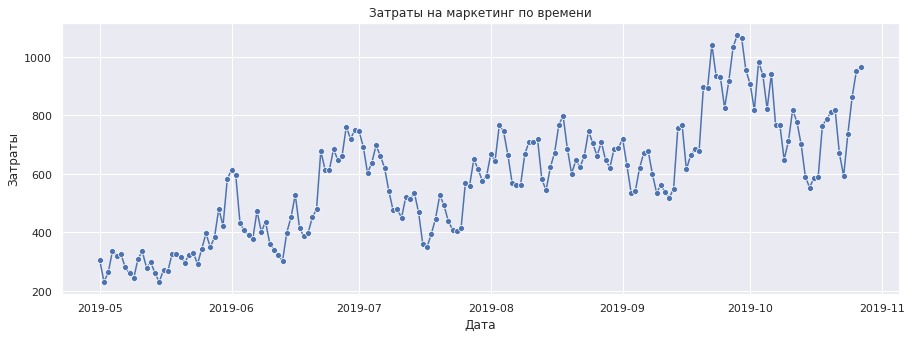

In [29]:
plt.figure(figsize=(15,5)) 
data = costs.pivot_table(index= 'dt', values = 'costs', aggfunc = 'sum') #.plot(figsize = (15,5), style='o-')
sns.lineplot(data=data, x="dt", y="costs", dashes=True, marker="o")
plt.title("Затраты на маркетинг по времени", size=12)
plt.ylabel("Затраты", size=12)
plt.xlabel("Дата", size=12);

График показывает, что с начала исследуемого периода затраты на маркетинг постоянно росли и выросли почти в 5 раз.

График истории изменений затрат по каналам привлечения

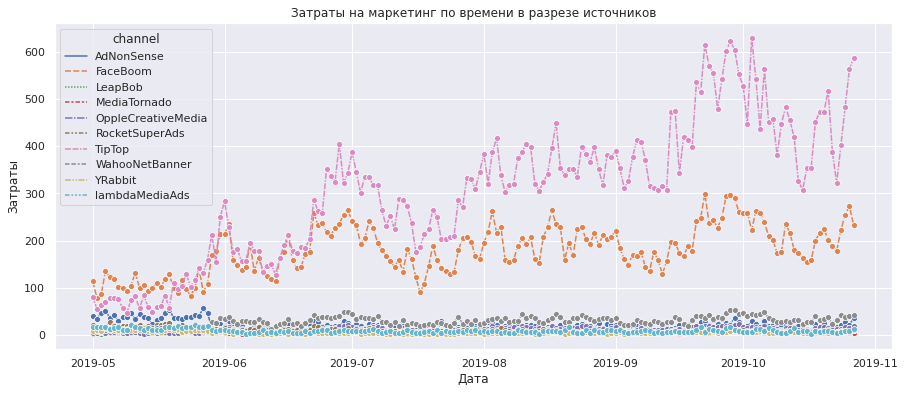

In [30]:
plt.figure(figsize=(15,6)) 
data1 = costs.pivot_table(index= 'dt', columns= 'channel', values = 'costs', aggfunc = 'sum')

sns.lineplot(data=data1, dashes=True, marker="o")
plt.title("Затраты на маркетинг по времени в разрезе источников", size=12)
plt.ylabel("Затраты", size=12)
plt.xlabel("Дата", size=12);

График показывает, что основными драйверами роста затрат на привлечения являются платформы TipTop и FaceBoom.    
Затраты на прочие источники стабильны. 

**Посмотрим затраты на маркетинг в разрезе месяцев:**

In [31]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['month_name'] = costs['dt'].astype('datetime64[M]').dt.month_name()
costs_by_month = costs.groupby('month')['costs'].sum().reset_index()
costs_by_month

,month,costs
0,2019-05-01,9978.57
1,2019-06-01,15090.05
2,2019-07-01,16447.06
3,2019-08-01,20657.87
4,2019-09-01,22441.34
5,2019-10-01,20882.41


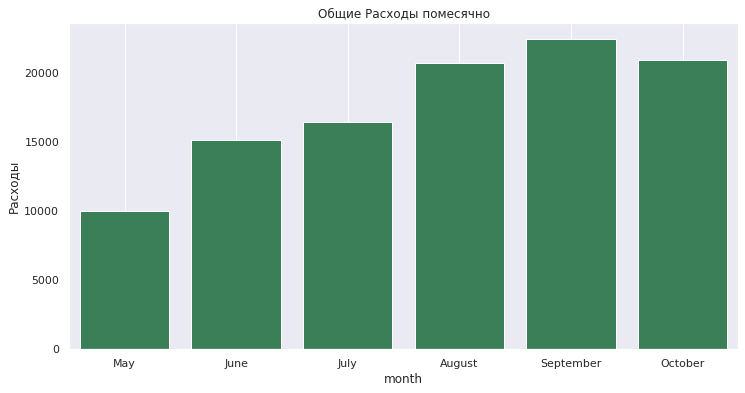

In [32]:
plt.figure(figsize=(12,6)) 
month_lst = costs['month_name'].unique()
ax = sns.barplot(x='month', y='costs', data=costs_by_month, color='seagreen')
ax.set_xticklabels(month_lst)
plt.title('Общие Расходы помесячно')
ax.set_ylabel('Расходы')
plt.grid();

Больше всего было потрачено на рекламу в сентябре, чуть меньше в октябре и августе, меньше всего в мае.

**Посмотрим затраты на маркетинг в разрезе месяцев и рекламных каналов:**

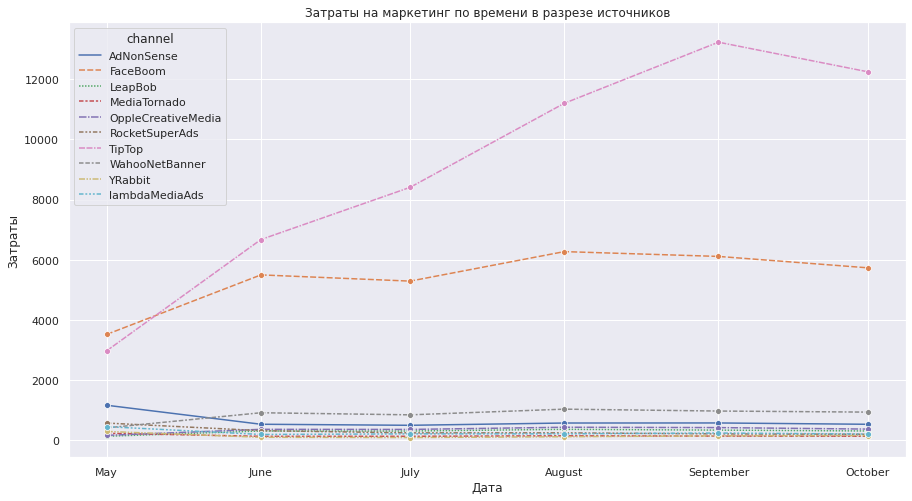

In [33]:
plt.figure(figsize=(15,8)) 
data2 = costs.pivot_table(index= 'month', columns= 'channel', values = 'costs', aggfunc = 'sum')

ax = sns.lineplot(data=data2, dashes=True, marker="o")
ax.set_xticklabels(month_lst)
plt.title("Затраты на маркетинг по времени в разрезе источников", size=12)
plt.ylabel("Затраты", size=12)
plt.xlabel("Дата", size=12);

 Каждый месяц с мая по сентябрь расходы на маркетинг росли.  График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем (пик пришелся на Сентябрь). Траты на FaceBoom так же росли за анализируемый период (но медленнее) Все остальные источники существенно уступают по объему расходов на маркетинг и не имеют значительных изменений за анализируемый период.

**Сколько в среднем стоило привлечение одного покупателя из каждого источника?**

In [34]:
round(profiles.groupby('channel').agg({'acquisition_cost':'mean'})\
                                 .sort_values(by='acquisition_cost', ascending=False), 2)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


TipTop является самым дорогим каналом привлечения пользователей - в среднем 2.80 на одного пользователя

**Cредний CAC на одного пользователя для всего проекта и для каждого источника трафика:**

Предварительно исключим пользователей с органическим трафиком, поскольку мы за них ничего не платим.

In [35]:
profiles_no_organic = profiles.query('channel != "organic"')
profiles_no_organic.describe()

,user_id,acquisition_cost
count,93569.00,93569.00
mean,499511553037.87,1.13
std,288160005783.07,0.99
min,599326.00,0.12
25%,250630088021.00,0.26
50%,497233070229.00,1.08
75%,749088915126.00,1.13
max,999979924135.00,3.72


In [36]:
print('Средний CAC: {:.2f}'.format(profiles_no_organic['acquisition_cost'].mean()))
print('Медиана CAC: {:.2f}'.format(profiles_no_organic['acquisition_cost'].median()))

Средний CAC: 1.13
Медиана CAC: 1.08


Медианная стоимость привлечения одного пользователя - 1.13 (без бесплатных). При этом среднее находится на значении 1.13. Вероятно, в какие-то периоды компания тратила на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.72.

Рассчитаем средний CAC по каждому каналу привлечения. Для этого сгруппируем профили и применим функцию mean() к значениям столбца acquisition_cost.   

In [37]:
cac = (profiles_no_organic.groupby('channel') # считаем средний CAC по каналам привлечения
                          .agg({'acquisition_cost': 'mean'})
                          .rename(columns={'acquisition_cost': 'cac'}))

cac.sort_values('cac', ascending=False)

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Остальные каналы берут за пользователя от 0.21 до 0.72.

**Вывод по разделу:**   

Всего затрачено на маркетинг: 105 497.3

Тройка самых дорогих источников: 
- TipTop - 54751.30, 
- FaceBoom - 32445.60, 
- WahooNetBanner - 5151.00     

График показывает, что с начала исследуемого периода затраты на маркетинг постоянно росли и выросли почти в 5 раз.    
- Средний CAC: 1,13 
- Медиана CAC: 1,08 

TipTop является самым дорогим каналом привлечения пользователей - в среднем затраты 2.8 на привлечение одного пользователя, при том, что он на 4-ом месте среди рекламных каналов по доле платящих пользователей!                            

Далее следуют FaceBoom - 1.11, и AdNonSense - 1.01. У всех остальных каналов средний CAC меньше 1.00

## Анализ окупаемости рекламы

С помощью LTV и ROI проанализируем:
- Общую окупаемость рекламы;
- Окупаемость рекламы с разбивкой по устройствам;
- Окупаемость рекламы с разбивкой по странам;
- Окупаемость рекламы с разбивкой по рекламным каналам.


- Построим графики Конверсии и Удержания с разбивкой по устройствам, странам, рекламным каналам.

Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

*Для анализа этого шага считаем, что мы смотрим данные **1 ноября 2019 года** и что в организации принято считать, что **окупаемость должна наступать не позднее, чем через 2 недели** после привлечения пользователей.*

Установим момент и горизонт анализа данных:

In [38]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Органических пользователей не будем включать в анализ, т.к. на них нет затрат на рекламу, а нам нужно изучить именно окупаемость рекламы.

In [39]:
profiles = profiles.query('channel != "organic"')

### Общая окупаемость рекламы
Оценим общую ситуацию с окупаемостью рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi():

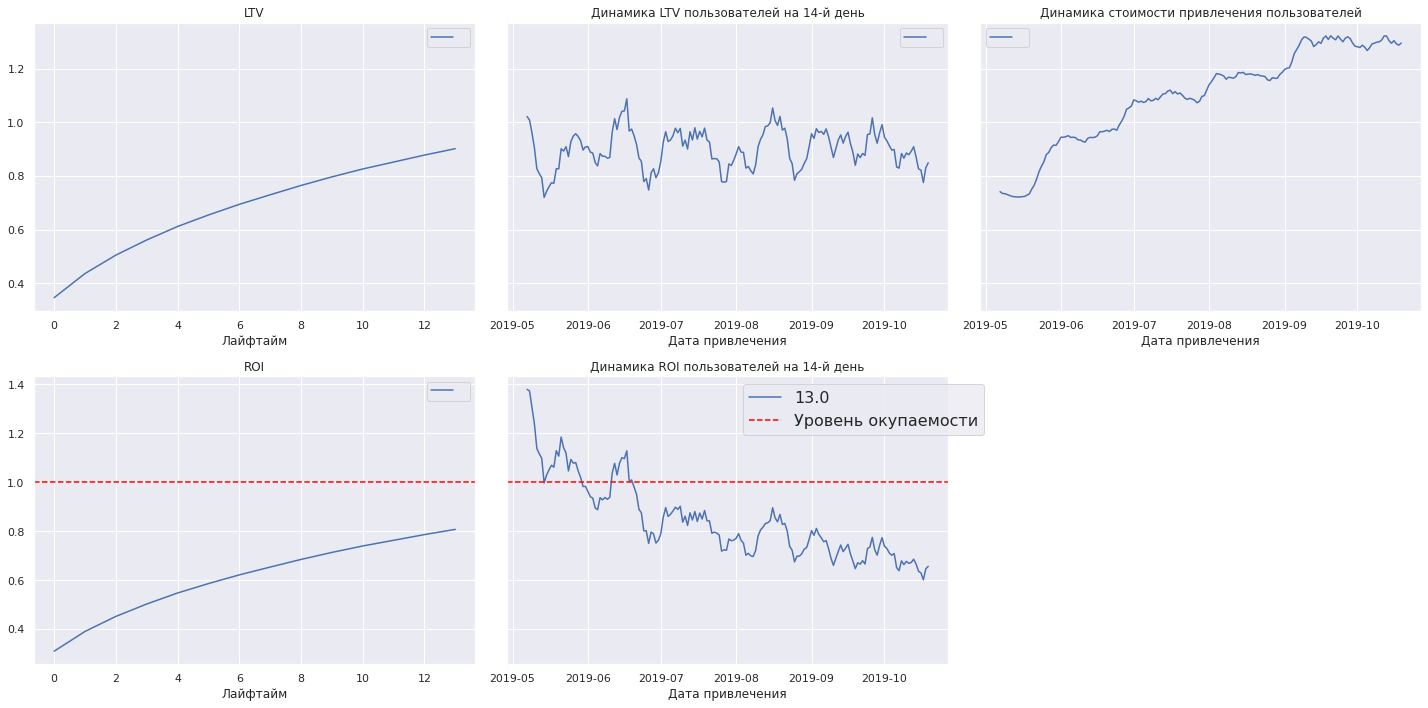

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days)
# визуализируем 
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**

- Реклама не окупается. ROI в конце лайфтайма — чуть выше 80%, динамика отрицательная.
- LTV растет к середине каждого месяца, но к концу месяца наблюдаются спады. В целом показатель стабилен.
- CAC растет.
- Мы наблюдаем увеличение стоимости привлечения пользователей, при этом ROI снижается.

### Окупаемость рекламы с разбивкой по устройствам
Проанализируем окупаемость рекламы с разбивкой по устройствам

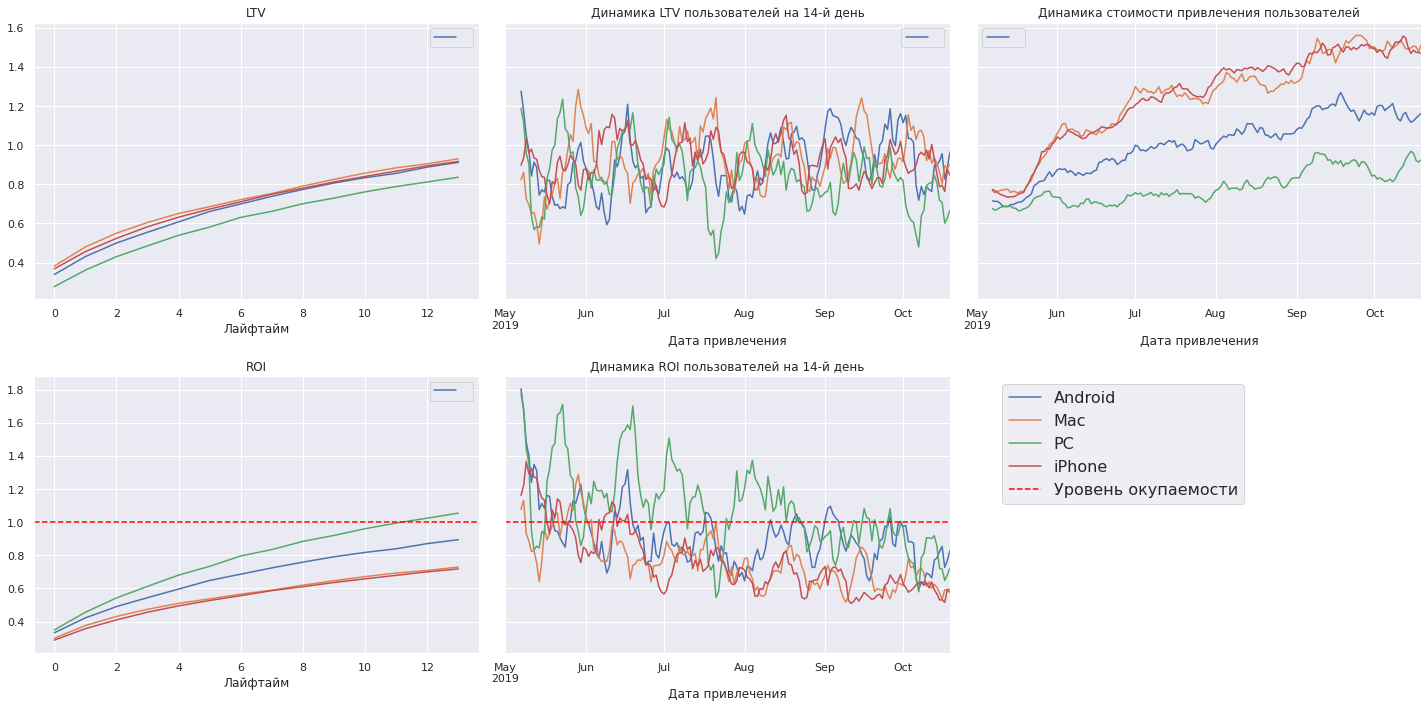

In [41]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**

- Окупается лишь реклама, используемая для привлечения PC-пользователей.    
- Аутсайдеры - пользователи техники Apple. По всем четырем видам устройств отрицательная динамика ROI.   
- Стоимость привлечения растет по всем видам устройств, но наиболее активно растет для iPhone и Mac - для устройств, которые показали худшие показатели окупаемости.   
- LTV в зависимости от устройства практически не отличается, за исключением PC - здесь LTV ниже.    

### Окупаемость рекламы с разбивкой по странам
Проанализируем окупаемость рекламы с разбивкой по странам

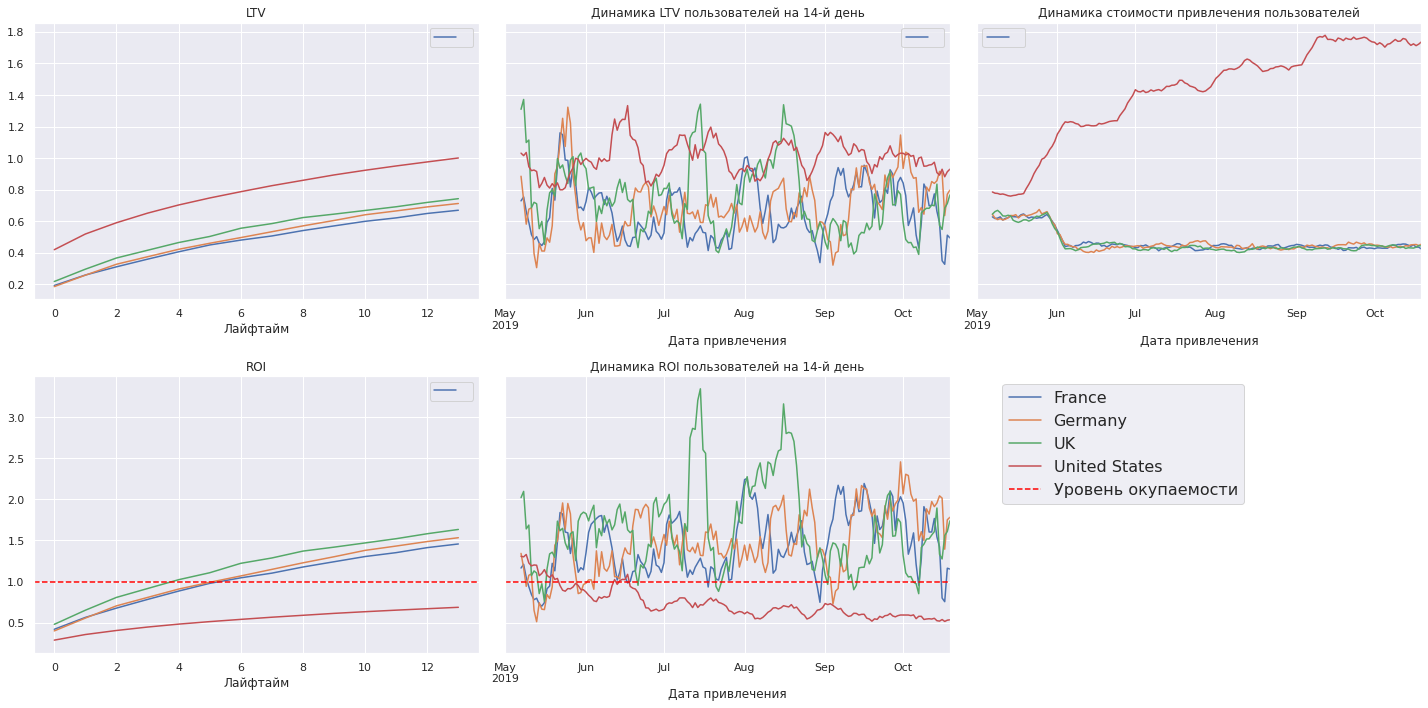

In [42]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод:**

- Реклама НЕ окупается только в США, а также только США имеет отрицательную динамику ROI.
- Стоимость привлечения пользователей из США растет и в несколько раз превышает стоимость для других стран, у которых стоимость стабильна и практически не изменяется (остается на одном уровне).
- LTV также выше у США, стальные страны соизмеримы по LTV.
- **Необходимо  далее отдельно и более детально проанализировать рекламой в США, тем более, что это основной рынок компании.**

### Окупаемость рекламы с разбивкой по рекламным каналам
Проанализируем окупаемость рекламы с разбивкой по каналам привлечения

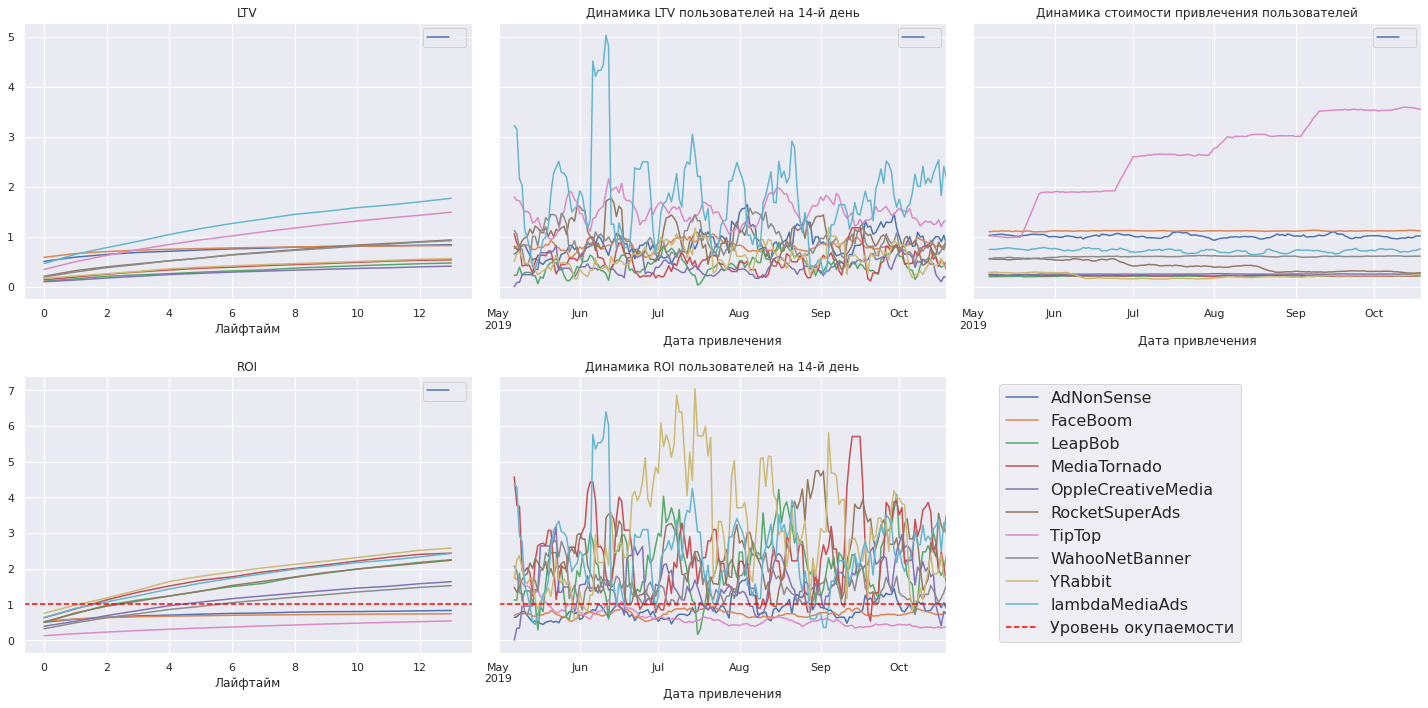

In [43]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**

- Динамика LTV пользователей приблизительно на одном уровне для всех рекламных каналов, за исключением lambdaMediaAds и TipTop  у них больше пиковых значений.
- Есть проблемы с окупаемостью у несколько каналов: **Реклама не окупается только для рекламных каналов TipTop, FaceBoom и AdNonSense** (а это самые дорогие источники привлечения по общим затратам САС / затратам на 1 пользователя).
- Стоимость привлечения пользователей TipTop растет и в несколько раз превышает стоимость для других рекламных каналов, у которых стоимость стабильна. Заметное падение показал только канал RocketSuperAds.

### Анализ Конверсии и Удержания пользователей
Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам:

**Конверсия и удержание в разбивке по устройствам:**

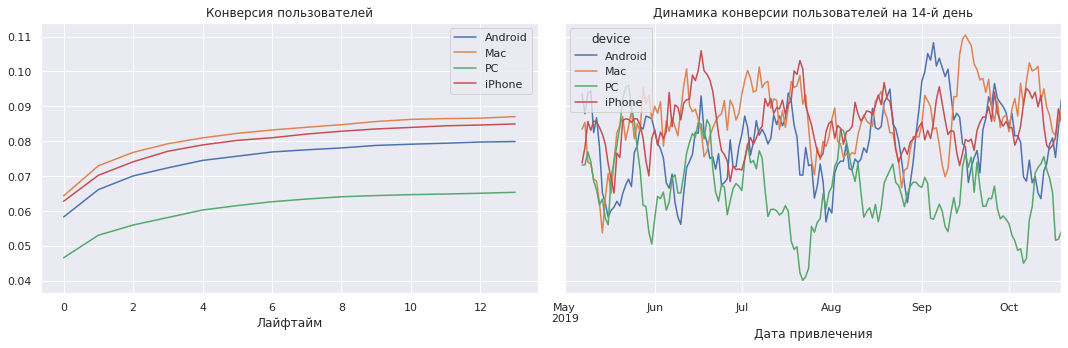

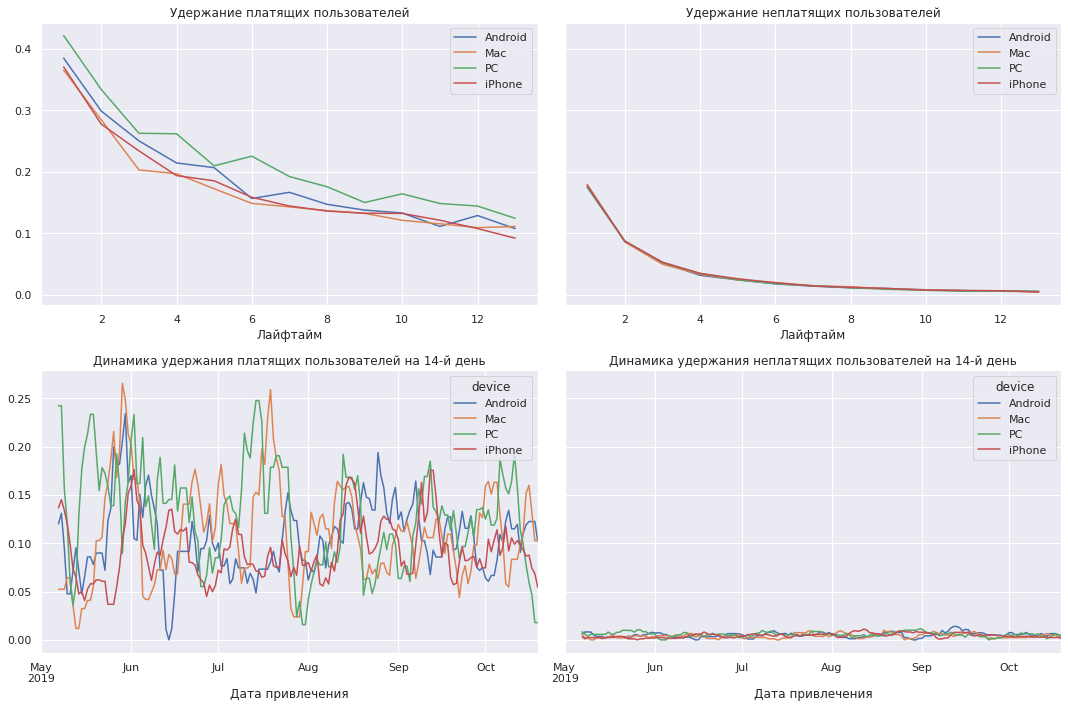

In [44]:
dimensions = ['device'] 
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon_days, 
                                                                        dimensions=dimensions)
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, 
                                                                    observation_date, 
                                                                    horizon_days, 
                                                                    dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Выше всего конверсия среди пользователей Mac и iPhone, хуже всего у пользователей PC.     
Но в то же время пользователи Mac и iPhone плохо удерживаются - у пользователей PC и Android показатель чуть лучше.

**Конверсия  и удержание в разбивке по странам**:

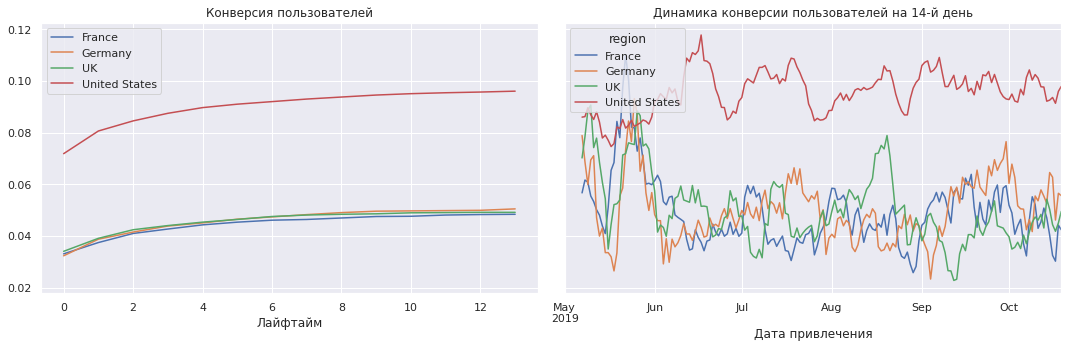

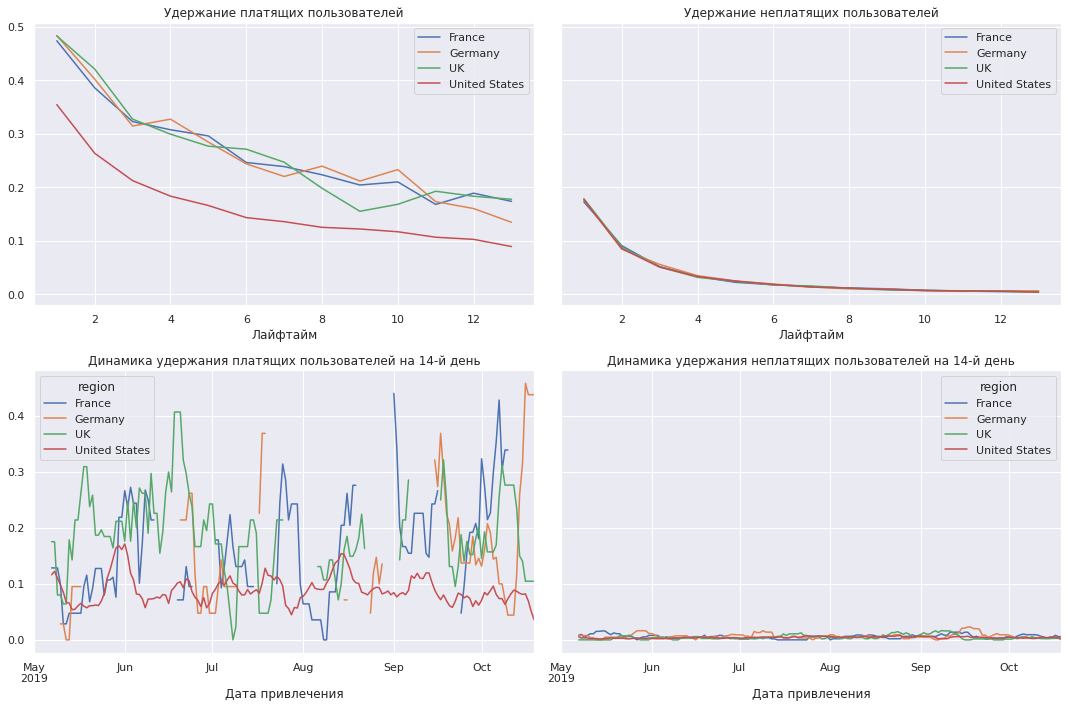

In [45]:
dimensions = ['region'] 
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon_days, 
                                                                        dimensions=dimensions)
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, 
                                                                    observation_date, 
                                                                    horizon_days, 
                                                                    dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Аналогичная ситуация в разбивке по странам - только вместо Apple здесь США. У США лучше всего конверсия, при худшем удержании.

**Конверсия и удержание в разбивке по каналам привлечения**:

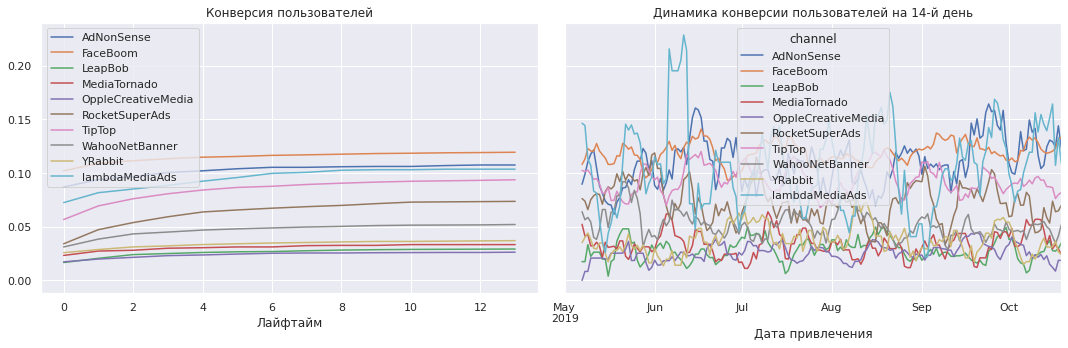

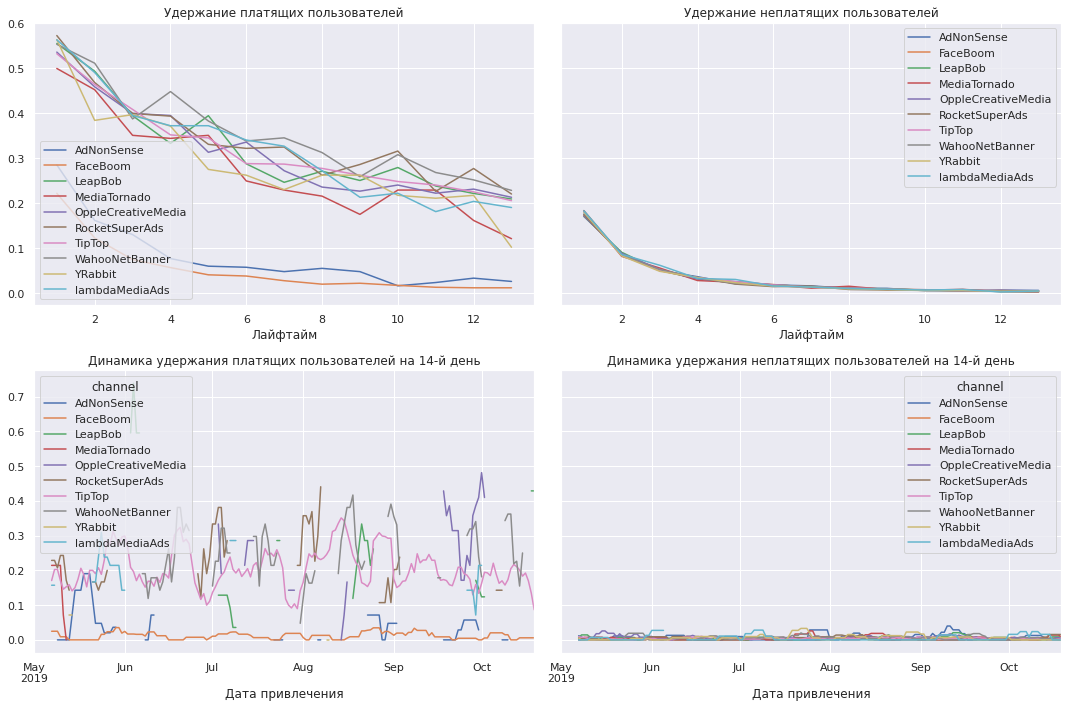

In [46]:
dimensions = ['channel'] 
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                                                                        orders, 
                                                                        observation_date,
                                                                        horizon_days, 
                                                                        dimensions=dimensions)
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, 
                                                                    observation_date, 
                                                                    horizon_days, 
                                                                    dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Лучшие по конверсии рекламные каналы - FaceBoom, AdNonSense, IambdaMediaAds.   
Хуже всего с удержанием у AdNonSense и FaceBoom.   


**Выводы:**     
Изучив графики конверсии и удержания в разбивке по устройствам, странам и рекламным каналам можно сделать вывод, что в тех случаях, где лучшая конверсия - худшее удержание соответственно (это США и устройства Apple)

Окупается ли реклама в целом?    
**Реклама не окупается.** ROI в конце лайфтайма — чуть выше 80%, динамика отрицательная.


**Чем могут быть вызваны проблемы окупаемости?**    
Стоимость привлечения растет по всем видам устройств, но наиболее активно растет для iPhone и Mac - для устройств, которые показали худшие показатели окупаемости.    
Реклама не окупается только в США, а также только США имеет отрицательную динамику ROI.    
Стоимость привлечения пользователей из США растет и в несколько раз превышает стоимость для других стран.     
Реклама не окупается только для рекламных каналов TipTop, FaceBoom и AdNonSense.    
Стоимость привлечения пользователей TipTop растет и в несколько раз превышает стоимость для других рекламных каналов, у которых стоимость стабильна.    
Основной причиной неокупаемости может являться стремительный рост стоимости привлечения по вышеуказанным параметрам, учитывая, что пользователи из США, устройств Mac и iPhone, и привлеченные через каналы TipTop и FaceBoom являются лидерами по количеству пользователей с большим отрывом.  

**Необходим дополнительный анализ рекламы в США, т.к. что это основной рынок компании:**

Определено, что **два канала являются проблемными - а именно, FaceBoom и TipTop**     
Чтобы понять, почему эти каналы оказывают такое большое влияние на окупаемость привлечения в США, стоит посмотреть, какой % составляет привлечение по ним. При этом важно не забыть исключить органических пользователей. Также по лидерам по привлечению еще раз проанализируем конверсию и удержание, ROI, LTV и САС).


### Анализ рекламы в США
Отфильтруем данные по США и без органики:

In [47]:
profiles_usa = profiles.query('channel != "organic" and region == "United States"')

По каким рекламным каналам шло привлечение пользователей в США?   
Какие каналы приносят больше всего платящих пользователей?

In [48]:
pivot_result('channel', profiles_usa)

,users_cnt,users_%,payer_cnt,payer_%
channel,,,,
FaceBoom,29144,47.14%,3557,12.20%
TipTop,19561,31.64%,1878,9.60%
RocketSuperAds,4448,7.19%,352,7.91%
MediaTornado,4364,7.06%,156,3.57%
YRabbit,4312,6.97%,165,3.83%


На рынке США представлены 5 рекламных каналов привлечения пользователей - FaceBoom, TipTop, RocketSuperAds, YRabbit, MediaTornado. Два крупных по кол-ву пользователей FaceBoom, TipTop, они же привлекают больще всего платных польхователей.

**Рассчитаем и визуализируем LTV и ROI с разбивкой по рекламным каналам**

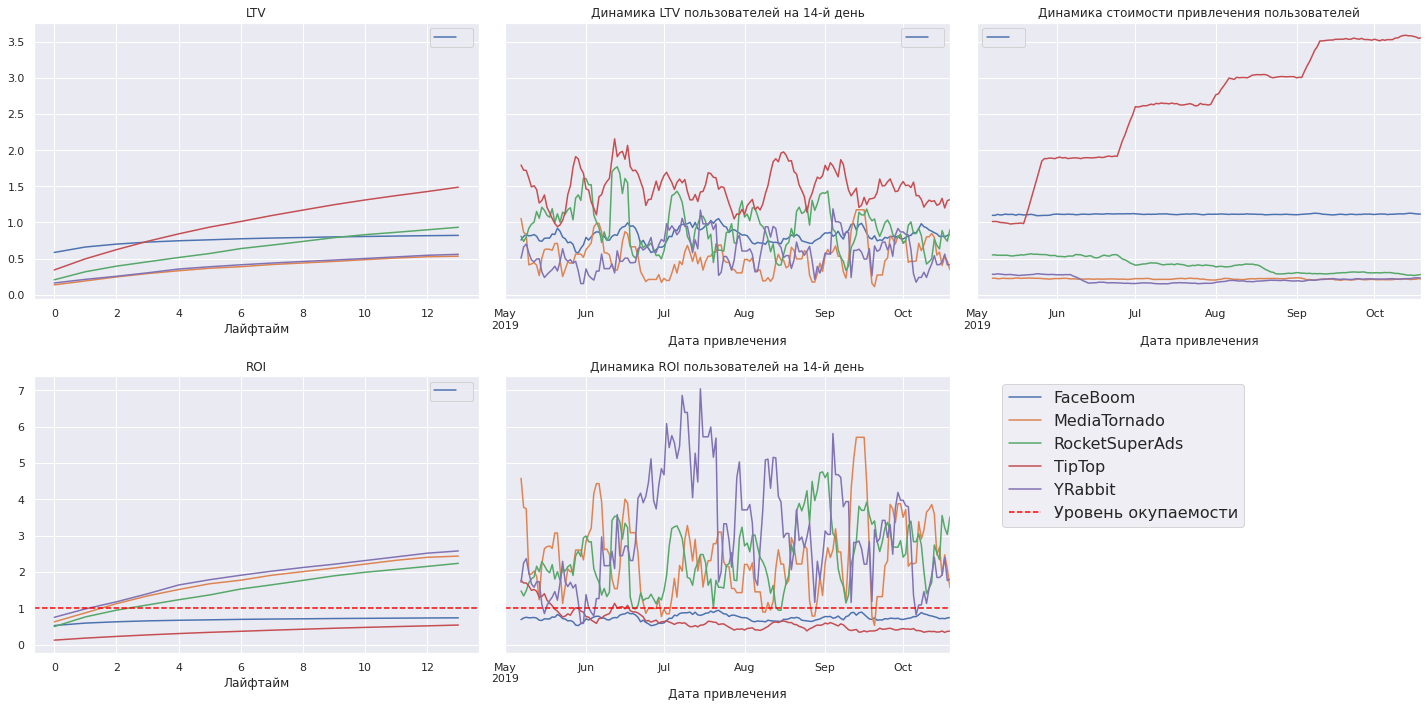

In [49]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_usa, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Динамика LTV пользователей приблизительно на одном уровне для всех рекламных каналов, за исключением TipTop - у него заметно больше пиковых значений, за ним идет RocketSuperAds.

Реклама не окупается только для рекламных каналов TipTop, FaceBoom, все остальные каналы - окупаемы.

Стоимость привлечения пользователей TipTop растет и в несколько раз превышает стоимость для других рекламных каналов, у которых стоимость стабильна, включая FaceBoom, который хоть и дороже остальных каналов за исключением TipTop, но стабилен. Заметное падение показал только канал RocketSuperAds.

Динамика ROI показывает, что больше всего пиковых значений у канала YRabbit.

**Построим и изучим графики конверсии и удержания с разбивкой по рекламным каналам**

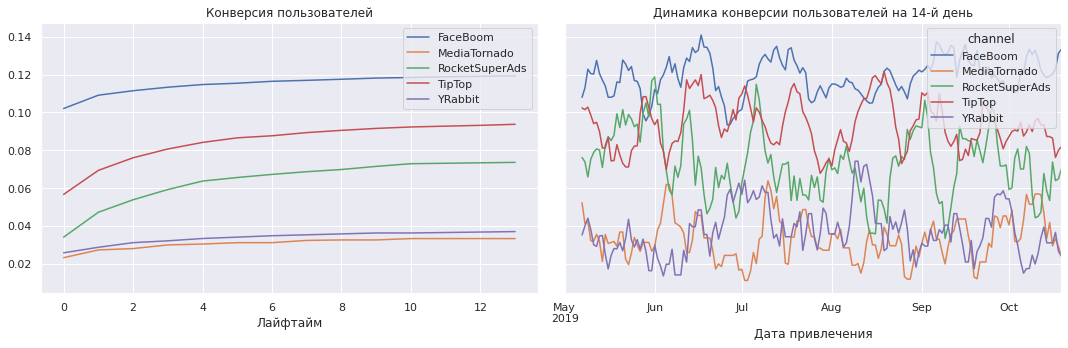

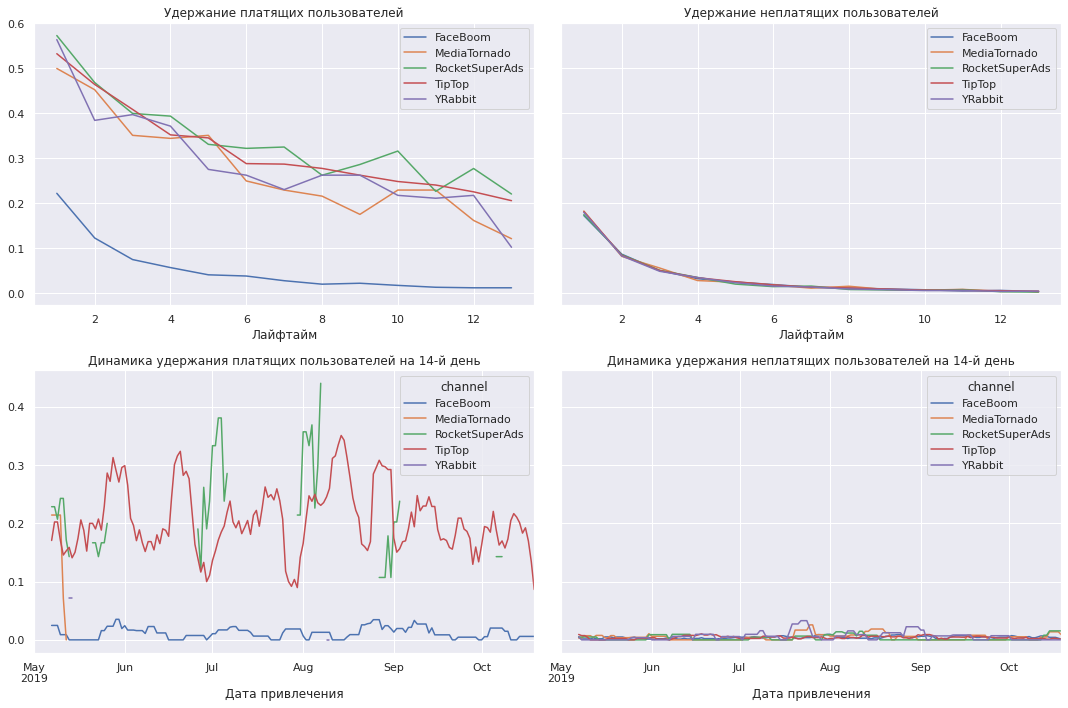

In [50]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles_usa, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizon_days, dimensions=dimensions)

retention_raw, retention_grouped, retention_history = get_retention(profiles_usa, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Лучшие по конверсии рекламные каналы - FaceBoom, TipTop, RocketSuperAds.    
Хуже всего с удержанием у FaceBoom, а лучше всего у RocketSuperAds.

**Вывод:**    
Изучив графики конверсии и удержания в разбивке по устройствам, странам и рекламным каналам можно сделать вывод, что в рамках рынка США история повторяется: в тех случаях, где лучшая конверсия - худшее удержание соответственно (FaceBoom).    
TipTop и FaceBoom являются самыми дорогими и в то же время единственными неокупаемыми каналами, но с лушчей конверсией пользователей. FaceBoom показал худшее удержание пользователей.    

Также можно порекомендовать привлечение пользователей из США через канал RocketSuperAds - канал демонстрирует хорошие показатели по метрикам:   
- третий по LTV и ROI после неокупаемых TipTop и FaceBoom, 
- стоимость привлечения пользователей у него падает, в отличие от остальных; 
- третий по конверсии, 
- лучший по удержанию пользователей.

##  Выводы
**Причины неэффективности привлечения пользователей:**   
Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд и это TipTop).
Большинство привлеченных пользователей - с самой высокой стоимостью привлечения и не достигшие уровня окупаемости.

**Рекомендации для отдела маркетинга для повышения эффективности:**
Направить внимание по окупаемости следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает. Возможно, стоит сделать какое-то маркетинговое предложение именно для владельцев устройств на базе их ПО.

Для пользователей из США в целом уровень окупаемости рекламы низкий. При этом стоимость привлечения пользователей из Америки - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США.

Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.

Еще можно попробовать применить силу социальных сетей - они сейчас очень динамично развиваются и являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.


**Сократить затраты на привлечение пользователей из следующих категорий:**  
- Страна - США;
- Устройство - Mac и iPhone;
- Рекламный канал - TipTop, FaceBoom и AdNonSense
- Попробовать распределить затраты в пользу пользователей из Европы, пользующихся PC и Android, а также привлеченных из всех остальных рекламных каналов, кроме вышеперечисленных, так как они окупаемы, стоимость привлечения стабильна и примерно одинакова, и имеют высокие показатели конверсии и удержания, до достижения общей окупаемости.

Изучив графики конверсии и удержания в разбивке по устройствам, странам и рекламным каналам можно сделать вывод, что в рамках рынка США история повторяется: в тех случаях, где лучшая конверсия - худшее удержание соответственно (FaceBoom).   
TipTop и FaceBoom являются самыми дорогими и в то же время единственными неокупаемыми каналами, но с лушчей конверсией пользователей. FaceBoom показал худшее удержание пользователей.   

Также можно порекомендовать привлечение пользователей из США через канал RocketSuperAds - канал демонстрирует хорошие показатели по метрикам:

- третий по LTV и ROI после неокупаемых TipTop и FaceBoom,
- стоимость привлечения пользователей у него падает, в отличие от остальных;
- третий по конверсии,
- лучший по удержанию пользователей.